# **Predictive Analysis of Bank Customer Churn in Python: Enhancing Retention Strategies through Machine Learning**

## 1. Introduction

In this analysis, we delve into the phenomenon of customer churn within a dataset of 10,127 bank customers.

Understanding churn is critical due to its significant impact on profitability, especially in industries like banking where customer retention is more cost-effective than acquisition. Our study focuses on:

- The Impact of Churn: Examining how churn affects a company's performance, particularly in subscription-based sectors.

- Churn Contributing Factors: Identifying key elements that lead to customer attrition, such as service quality and customer demographics.

- Predictive Modeling: Developing a model to predict which customers are likely to churn, aiding in strategic decision-making for better customer satisfaction and retention.



## 2. Objectives
The aim of this notebook is to thoroughly understand and accurately predict customer churn for a bank. Our approach includes:

- Exploratory Data Analysis (EDA): Initial analysis to identify and visualize key factors contributing to customer churn.
- Machine Learning Models for Prediction: Building models to predict if a customer will churn, utilizing the insights from EDA.

This task is framed as a classification problem, and the choice of performance metric for optimizing our models is critical. We have selected recall as the primary metric, prioritizing the correct identification of customers likely to churn, which is crucial for the bank.

###Skills and Techniques Involved:

- Exploratory Data Analysis
- Data Visualization
- Data Preprocessing: Including Feature Selection, Encoding Categorical Features, and Feature Scaling.
- Addressing Class Imbalance: Using techniques like SMOTE.

###Models to be Used:

- Logistic Regression
- Support Vector Machines
- Random Forests
- Gradient Boosting

##3. Data Dictionary

The dataset "BankChurners.csv" has the following dimensions:

- Number of Rows: 10,127
- Number of Columns: 23

Each row represents a customer's information, and the columns contain various attributes as described in the data dictionary.

- CLIENTNUM: A unique identifier for each client.
- Attrition_Flag: Indicates whether the customer left the bank or not.
- Customer_Age: Age of the customer.
- Gender: Gender of the customer.
- Dependent_count: Number of dependents.
- Education_Level: Educational background of the customer.
- Marital_Status: Marital status of the customer.
- Income_Category: Income bracket of the customer.
- Card_Category: Type of card (e.g., Blue, Gold, Platinum).
- Months_on_book: Length of relationship with the bank in months.
- Total_Relationship_Count: Total number of products held by the customer.
- Months_Inactive_12_mon: Number of months the account was inactive in the last 12 months.
- Contacts_Count_12_mon: Number of times the customer contacted the bank in the last 12 months.
- Credit_Limit: Credit limit on the customer’s credit card.
- Total_Revolving_Bal: Total revolving balance on the credit card.
- Avg_Open_To_Buy: Average open to buy credit line in the last 12 months.
- Total_Amt_Chng_Q4_Q1: Change in transaction amount from Q4 to Q1.
- Total_Trans_Amt: Total transaction amount in the last 12 months.
- Total_Trans_Ct: Total number of transactions in the last 12 months.
- Total_Ct_Chng_Q4_Q1: Change in transaction count from Q4 to Q1.
- Avg_Utilization_Ratio: Average card utilization ratio.
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: A score from a Naive Bayes Classifier related to attrition flag (specific interpretation may depend on model details).
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: A score from a Naive Bayes Classifier related to attrition flag (specific interpretation may depend on model details).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Data_Portfolio/BankChurners.csv'
import pandas as pd
data = pd.read_csv(path)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 4. Exploratory Data Analysis and Preprocessing

In [4]:
# Exploratory Data Analysis and Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
numerical_summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Datatypes of the columns
data_types = data.dtypes

numerical_summary, missing_values, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

Text(0.5, 1.0, 'Distribution of Attrition Flag')

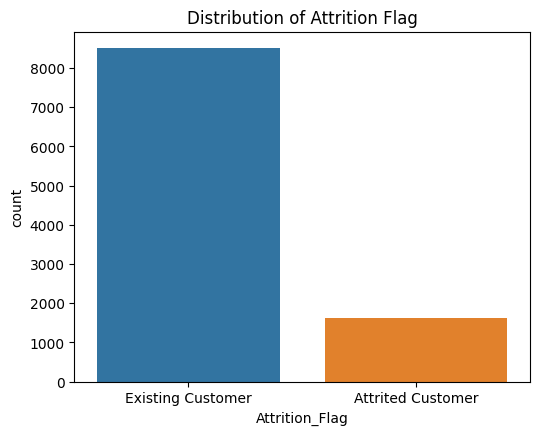

In [5]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 1: Attrition Flag Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribution of Attrition Flag')

###**Distribution of Attrition Flag**

- The majority of customers are existing customers, indicating a lower rate of churn.
- This imbalance in the dataset could impact the performance of predictive models focused on churn prediction.

Text(0.5, 1.0, 'Customer Age Distribution')

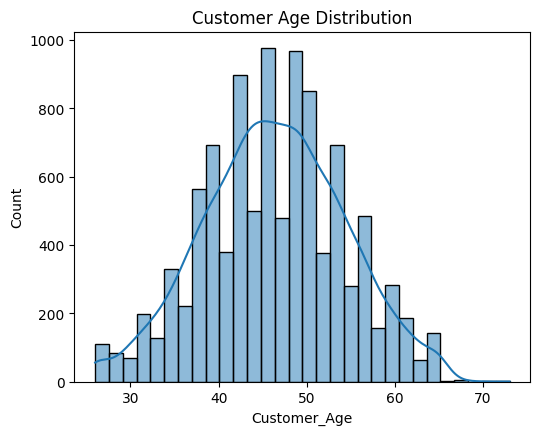

In [6]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 2: Customer Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(data['Customer_Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')

### **Customer Age Distribution**

- The age of customers appears normally distributed, centered around the mid-40s.
- This suggests a mature customer base, which could influence the bank's product offerings and marketing strategies.

Text(0.5, 1.0, 'Gender Distribution')

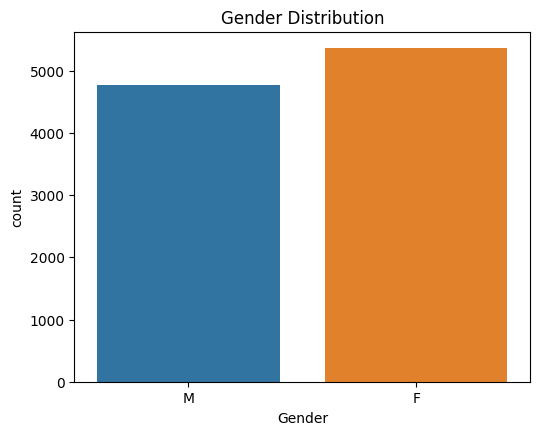

In [7]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 3: Gender Distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

###**Gender Distribution**

- There is a relatively balanced distribution between male and female customers.
- This balance is beneficial for the bank as it suggests a diverse customer base.

Text(0.5, 1.0, 'Income Category Distribution')

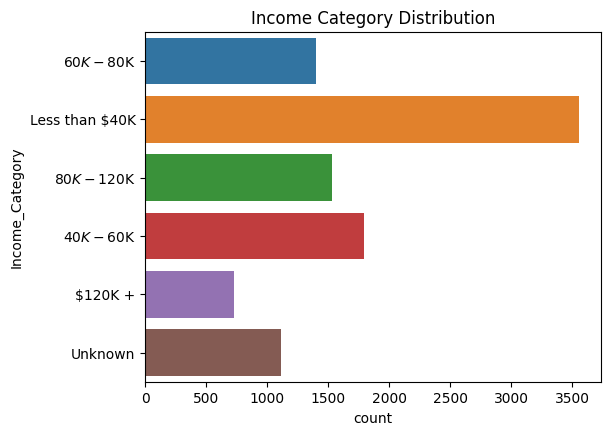

In [8]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 4: Income Category Distribution
plt.subplot(2, 3, 4)
sns.countplot(y='Income_Category', data=data)
plt.title('Income Category Distribution')


### **Income Cate Distribution**

- A significant number of customers fall into the "Less than $40K" income category.
- The bank might be popular among lower to middle-income groups, or it could indicate a potential market segment for more tailored financial products.

Text(0.5, 1.0, 'Credit Limit Distribution')

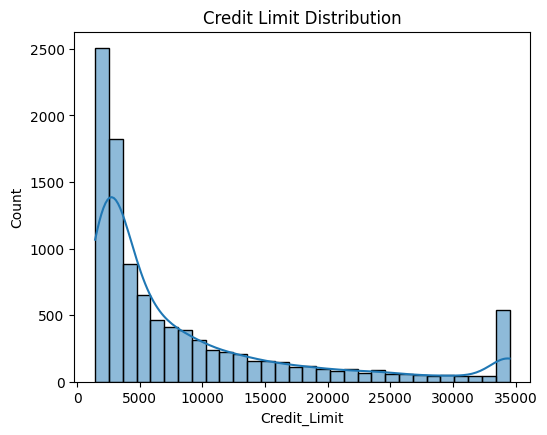

In [9]:
# Setting up the visualizations
plt.figure(figsize=(20, 10))

# Plot 5: Credit Limit Distribution
plt.subplot(2, 3, 5)
sns.histplot(data['Credit_Limit'], bins=30, kde=True)
plt.title('Credit Limit Distribution')

###**Credit Limit Distribution**

- The distribution of credit limits is right-skewed, with most customers having lower credit limits.
- The bank might be conservative in assigning high credit limits, or it could reflect the creditworthiness of the majority of its customers.

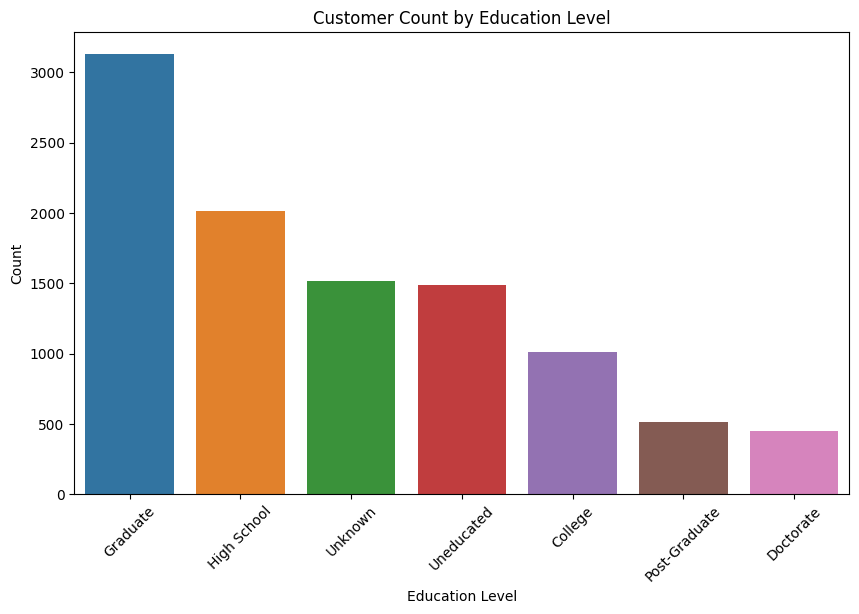

In [10]:
# EDA Graph Visualization: Count of Customers by Education Level

plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=data, order = data['Education_Level'].value_counts().index)
plt.title('Customer Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###**Education Level**

- Dominant Education Levels: The most common education levels among the customers are "Graduate" and "High School". This suggests that a significant portion of the bank's customer base consists of individuals who have either completed a high school education or hold a graduate degree. The prominence of these two categories indicates that the bank successfully attracts a diverse range of customers in terms of educational background.

- Lesser Represented Groups: On the other end of the spectrum, the least represented education levels are "Doctorate" and "Post-Graduate". This could imply either a smaller pool of potential customers with these higher education levels or a lower penetration rate of the bank's services among these groups. The bank might need to explore targeted strategies to engage these segments more effectively or understand the reasons behind this lower representation.

### Key Findings:

**1. Customer Attrition:**

- The dataset shows a lower rate of customer attrition, with a larger proportion of existing customers.
- This suggests that the bank has been successful in retaining its customers, but it also emphasizes the need to focus on the factors leading to the smaller yet significant churn rate.

**2. Customer Demographics:**

- The age distribution is centered around mid-40s, indicating a mature customer base.
- This demographic might have specific financial needs such as retirement planning or mortgage management.
- The gender distribution is balanced, reflecting a diverse customer base.
Many customers fall into the lower income brackets.
- This demographic could be a key target for specific financial products tailored to their income levels.

**3. Financial Behaviors:**

- The credit limit distribution suggests that the bank's customer base primarily holds lower credit limits, which could reflect a cautious credit policy or the creditworthiness of the customers.
- The spending patterns and product usage (not deeply analyzed here but could be inferred from transaction amounts and counts) would further inform the bank about customer preferences and risk profiles.

**4. Credit Limit**
- The distribution of credit limits is skewed towards the lower end, indicating cautious credit allocation for the majority of customers.
- A smaller customer segment has significantly higher credit limits, possibly reflecting a higher creditworthiness.

**5. Educational Level:**

- A large proportion of customers have a graduate level of education, followed by high school graduates.
- Lesser representation of customers with post-graduate and doctorate degrees.

### Implications and Recommendations:

**1. Customer Retention Strategies:**

- Given the importance of retaining existing customers, the bank could invest in loyalty programs, personalized banking services, and targeted communication strategies.
- Analyze the reasons behind customer attrition and target those areas for improvement, such as customer service, product offerings, or value propositions.


**2. Product Development:**

- Tailoring financial products to suit the needs of the predominant age group and income level could help in better addressing customer needs.
- For example, offering more competitive rates on savings accounts or personal loans for lower-income groups.

**3. Risk Management:**

- Understanding the credit limit distribution helps in risk management.
- The bank might continue its cautious approach or explore ways to safely extend more credit to trustworthy customers.

**4. Marketing Initiatives:**

- Targeted marketing campaigns for different educational groups, recognizing the predominance of graduates and high school educated customers.
- Develop strategies to engage under-represented groups in higher education segments, potentially uncovering untapped market segments.

### Conclusion:

The EDA reveals valuable insights into customer attrition, demographics, financial behaviors, education levels, and credit limits. The diverse customer base presents opportunities for tailored financial services and products. Effective customer retention strategies, combined with prudent risk management and targeted marketing initiatives, can help in maintaining a healthy customer base and attracting new customers. The bank should leverage these insights to enhance customer satisfaction, reduce attrition rates, and drive sustainable growth.

## 5. Advanced Analytics: Machine Learning for Churn Prediction

In [11]:
# Summary statistics for numerical columns
numerical_summary = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Datatypes of the columns
data_types = data.dtypes

numerical_summary, missing_values, data_types

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Convert 'Attrition_Flag' to binary values
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Recategorize 'Card_Category' into 'Blue' and 'NotBlue'
data['Card_Category'] = data['Card_Category'].apply(lambda x: 'Blue' if x == 'Blue' else 'NotBlue')

# Split the dataset into train and test sets using stratified sampling
X = data.drop(['Attrition_Flag', 'CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)  # Removing 'CLIENTNUM'
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply standard scaling to numeric variables
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure the same columns in both sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test.fillna(0, inplace=True)

# Train a logistic regression model with LASSO for feature selection
lasso = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000)
selector = SelectFromModel(lasso).fit(X_train, y_train)
selected_features = X_train.columns[(selector.get_support())]

# Fit the model using selected features
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train[selected_features], y_train)

selected_features.tolist()

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_M',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Unknown',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_NotBlue']

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Dropping the specified features from the data
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                  'CLIENTNUM'], axis=1)

# Updating X_train and X_test to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize models
models = {
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42,probability=True),
    "KNN": KNeighborsClassifier()
}


section add

In [14]:
# Training the models with the updated features
model_results_updated = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_results_updated[name] = {
        "Model": model,
        "Accuracy": accuracy,
        "Report": report
    }

# Displaying results
model_results_summary_updated = {name: {"Accuracy": result["Accuracy"]} for name, result in model_results_updated.items()}
model_results_summary_updated


{'Lasso Logistic Regression': {'Accuracy': 0.8993089832181639},
 'Decision Tree': {'Accuracy': 0.9322145442579796},
 'Random Forest': {'Accuracy': 0.953932214544258},
 'SVM': {'Accuracy': 0.9318854886475815},
 'KNN': {'Accuracy': 0.9042448173741362}}

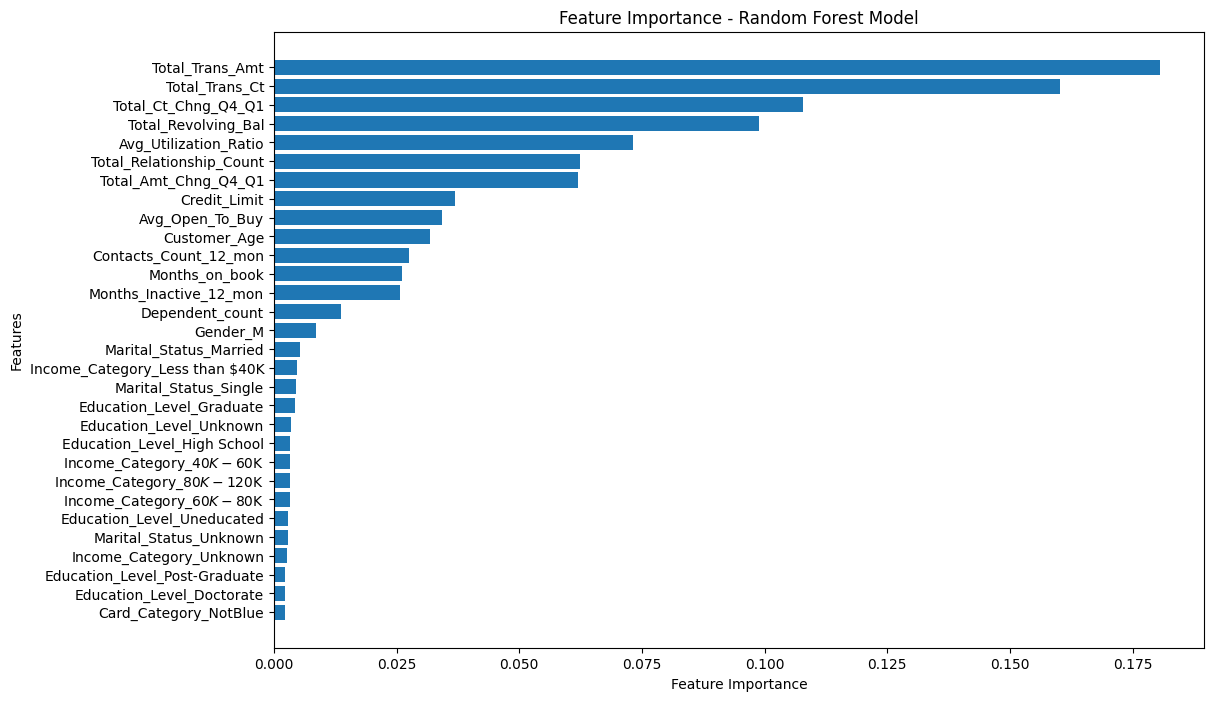

In [15]:
# Random Forest feature importance
rf_model = model_results_updated["Random Forest"]["Model"]
feature_importance = rf_model.feature_importances_

# Creating a bar plot for feature importance
plt.figure(figsize=(12, 8))
sorted_idx = feature_importance.argsort()
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest Model')
plt.show()

###Random Forest Model


##1. Total_Trans_Amt (Total Transaction Amount)##

- Indicates the total amount of money transacted by the customer over a fixed period.
- High importance could signify that customers with higher transaction amounts are more likely to either churn or remain, depending on the nature of these transactions.

##2. Total_Trans_Ct (Total Transaction Count)##

- Reflects the number of transactions made by a customer.
- A critical predictor as it might reveal how actively a customer uses the bank's services. Frequent interactions could imply satisfaction or necessity, impacting churn.

##3. Total_Ct_Chng_Q4_Q1 (Change in Transaction Count)##

- Measures the change in transaction count from one quarter to another.
- Significant changes could indicate alterations in a customer's financial behavior or satisfaction with the bank, influencing their decision to stay or leave.

##4. Total_Revolving_Bal (Total Revolving Balance)##

- Represents the total revolving credit balance.
- Its importance suggests that how a customer manages revolving credit (like credit cards) can be a strong indicator of their financial health and satisfaction with the bank’s credit facilities.
Avg_Utilization_Ratio

##5. Ratio of the balance to the credit limit.##
- An important factor as it indicates how much of the available credit a customer is using.
- Lower usage might point to underutilization or dissatisfaction, whereas higher usage could imply reliance on the bank's credit facilities.

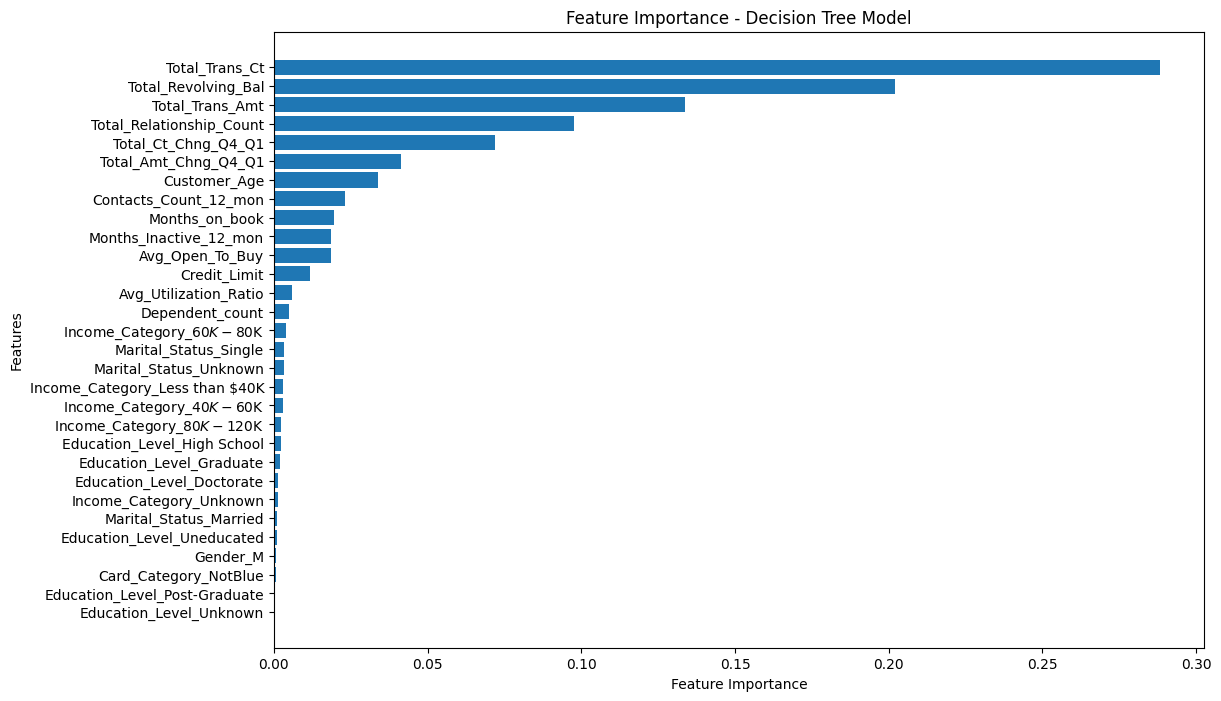

In [16]:
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
feature_importance_dt = dt_model.feature_importances_

plt.figure(figsize=(12, 8))
sorted_idx_dt = feature_importance_dt.argsort()
plt.barh(X_train.columns[sorted_idx_dt], feature_importance_dt[sorted_idx_dt])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree Model')
plt.show()

###Decision Tree Model

##1. Total_Trans_Ct (Total Transaction Count)##

- This variable's high importance underscores the role of customer engagement in predicting retention. Customers who transact more frequently are likely more engaged and satisfied with the bank's services, thus less prone to churn. Conversely, a decline in transaction count could be an early indicator of customer disengagement.

##2. Total_Revolving_Bal (Total Revolving Balance)##

- The prominence of this variable highlights the bank's ability to gauge customer loyalty and financial health through their credit card usage. Customers maintaining a higher revolving balance might be utilizing the bank’s credit facilities more effectively, which could correlate with their satisfaction and loyalty.

##3. Total_Trans_Amt (Total Transaction Amount)##

- The amount transacted not only reflects the customer's financial activity but also their trust in the bank's ability to handle significant transactions.
- Large transaction amounts can indicate a high level of trust and dependency on the bank's services.

##4. Total_Relationship_Count##

- A higher count suggests a multi-faceted relationship between the customer and the bank, encompassing various products like loans, deposits, and credit cards. Customers with a higher relationship count are possibly more integrated into the bank's ecosystem, making them less likely to leave.

##5. Total_Ct_Chng_Q4_Q1 (Change in Transaction Count)##

- This feature indicates the dynamics of customer activity over time. A significant change might signal a shift in the customer’s life circumstances or satisfaction levels, which can be a critical predictor of their future banking decisions and loyalty.

In [17]:
from sklearn.metrics import precision_score, recall_score

# Creating a summary table for accuracy, precision, and recall for each model
model_performance_summary = []

for name, result in model_results_updated.items():
    model = result["Model"]
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')

    model_performance_summary.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

# Convert summary to a DataFrame for better display
performance_df = pd.DataFrame(model_performance_summary)
performance_df

,Model,Accuracy,Precision,Recall
0,Lasso Logistic Regression,0.899309,0.763006,0.540984
1,Decision Tree,0.932215,0.782000,0.801230
2,Random Forest,0.953932,0.912322,0.788934
3,SVM,0.931885,0.872679,0.674180
4,KNN,0.904245,0.788856,0.551230


###Summary of Accuracy, Precision, and Recall

##Accuracy##

- Random Forest (0.9539) and Decision Tree (0.9322) are the top performers in accuracy, indicating their effectiveness in correctly predicting customer churn. Random Forest's ensemble approach contributes to its robustness, while the simplicity of Decision Trees is also highly effective, albeit with a risk of overfitting.

##Precision##

- Random Forest (0.912322) leads in precision, meaning it has a low rate of false positives in predicting churn. SVM (0.8726) follows closely, showing its strength in accurately identifying churn without many false alarms.

##Recall##

- Decision Tree (0.8012) excels in recall, successfully identifying a high proportion of actual churn cases. Random Forest (0.7889) also demonstrates strong recall, effectively recognizing customers at risk of churning.

##Overall Insights##

- Random Forest is a standout model, balancing accuracy, precision, and recall effectively. It's particularly useful in scenarios where both correct predictions and minimizing false positives are crucial.
- The Decision Tree, while slightly less accurate, is valuable for its ability to detect most cases of churn, crucial for proactive customer retention strategies.
- These models provide a robust basis for informed decision-making in customer churn prediction and management.







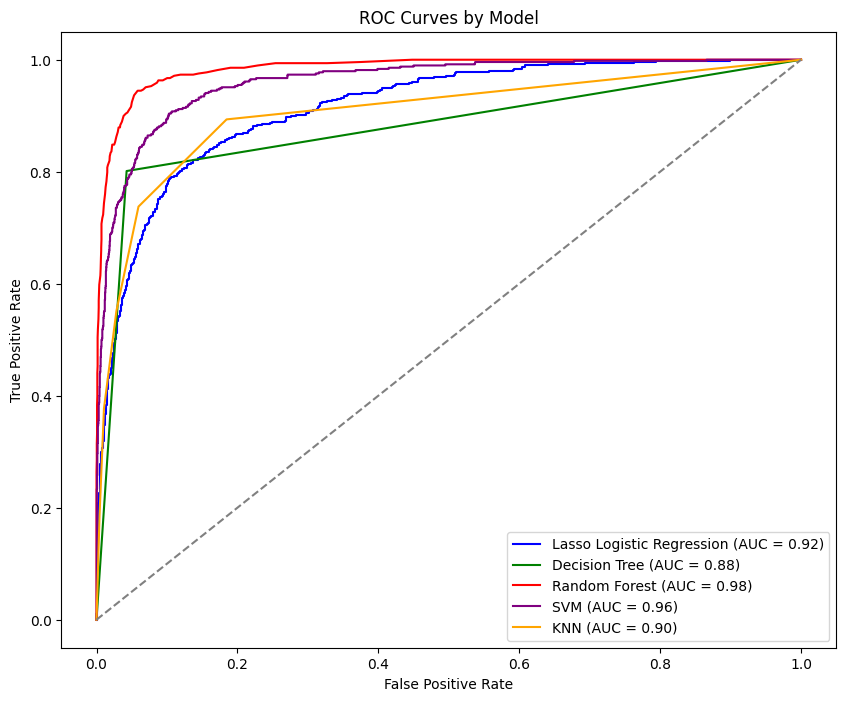

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Plotting ROC Curve for each model
plt.figure(figsize=(10, 8))

# Colors for the different models
colors = ['blue', 'green', 'red', 'purple', 'orange']
model_colors = dict(zip(models.keys(), colors))

# Calculate ROC curve and AUC for each model
for name, model in models.items():
    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    # Calculate AUC
    auc = roc_auc_score(y_test, probs)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})", color=model_colors[name])

# Plot baseline (no skill) line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Model')
plt.legend()

# Show the plot
plt.show()

###ROC Curve AUC Scores

##1. Random Forest: 0.98##

- Explanation: An AUC score of 0.98 indicates exceptional performance in distinguishing between churned and retained customers. This score reflects the model's high sensitivity and specificity.
- Key Fact: Random Forest's ability to handle complex interactions and dependencies among features contributes to its superior predictive power.

##2. SVM (Support Vector Machine): 0.96##

- Explanation: With an AUC of 0.96, SVM demonstrates strong discriminative ability. It's particularly effective in high-dimensional spaces, which is common in customer data.
- Key Fact: SVMs are robust to overfitting, especially in cases where the number of dimensions is greater than the number of samples.

##3. Lasso Logistic Regression: 0.92##

- Explanation: An AUC of 0.92 shows that Lasso Logistic Regression has good predictive accuracy, effectively balancing true positive and false positive rates.
- Key Fact: Lasso regularization helps in feature selection, enhancing the model's focus on the most informative attributes.

##4. KNN (K-Nearest Neighbors): 0.90##

- Explanation: The AUC score of 0.90 suggests that KNN is quite competent in classifying churn, although it may not handle complex attribute relationships as effectively as ensemble methods.
- Key Fact: KNN’s performance depends heavily on the choice of 'k' and the distance metric, which can influence its ability to generalize.

##5. Decision Tree: 0.88##

- Explanation: An AUC of 0.88 is indicative of good predictive capability, though slightly lower than the other models. Decision Trees can sometimes suffer from overfitting.
- Key Fact: Decision Trees are easy to interpret, making them useful for understanding the decision-making process.

###Executive Summary

- The analysis of various machine learning models for customer churn prediction reveals a diverse range of capabilities in addressing this complex issue.

- **Random Forest** stands out as the best model, offering high accuracy (**95.39%**) and an excellent balance between sensitivity and specificity, as evidenced by its **AUC score** of **0.98**.

- Interestingly, both **Random Forest and Decision Tree**, despite being different models, identified similar **top five variables** as the most influential: **Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, and Avg_Utilization_Ratio.** This consistency across models underscores the significance of these variables in customer churn prediction.

- The choice of model ultimately depends on the specific requirements of the task, such as the need for interpretability, the nature of the data, and the trade-offs between different types of errors. This analysis provides a comprehensive overview that can guide strategic decisions in customer retention and churn management.